## Machine Learning to Predict Institution Performance

The public education sector in Peru is under the governance of the Ministry of Education (Minedu) at the national level. However, 26 Regional Offices and 222 Local Education Management Units (UGELs or Unidades de Gestión Educativa Local) are responsible for various functions and responsibilities, such as enrolling students, hiring teachers, distributing books, addressing bullying and violence cases, among others.

The CdD (Comrpomisos de Desempeño) program evaluates the performance of the UGEL through indicators. This performance can be measured with a number of metrics, such as the mean achievement score in a year, or the percentage of indicators where the UGEL reach the goal. In this brief anaysis, I intend to predict the performance of the UGEL and find the key factors that affect theses institutions' ability to do a good job.

The dataframe iged_df_ml was built beforehand using R.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
iged_df_ml = pd.read_excel("F:/Rodrigo/Antiguo Escritorio/Rodrigo/Cursos y Proyectos/Data Projects/Performance prediction - Machine Learning/Resources/iged_df_ml.xlsx")

iged_df_ml.set_index(['year', 'codooii'], inplace=True)

iged_df_ml['year'] = iged_df_ml.index.get_level_values('year').astype(str)
iged_df_ml = pd.get_dummies(iged_df_ml, columns=['year'], prefix='year')

iged_df_ml = iged_df_ml.drop(columns=['year_2021'])

iged_df_ml = iged_df_ml.drop(['ue', 'region', 'ugel', 'entity_type'], axis=1)

print(list(iged_df_ml.columns))
print(len(iged_df_ml))
iged_df_ml.head()

['desv_mean_achievement', 'target_met_perc', 'delta_achievement', 'mean_achievement', 'delta_target_met', 'desv_target_met', 'potential_monetary_incentive', 'delta_potential_monetary_incentive', 'rainforest_perc', 'mean_elevation', 'internet_available', 'internet_speed', 'schools_kinder', 'schools_primary', 'schools_secondary', 'schools_adults', 'schools_specialneeds', 'schools_bilingual', 'schools_tech', 'institutes_teacherschools', 'institutes_tech', 'pupils_kinder', 'pupils_primary', 'pupils_secondary', 'pupils_adults', 'pupils_specialneeds', 'pupils_bilingual', 'pupils_tech', 'pupils_teacherschools', 'pupils_tech_institutes', 'pipuls_rural', 'teachers', 'schools', 'pupils', 'rural_perc', 'mean_distance_schools', 'sum_distance_schools', 'ugel_staff', 'ugel_pedagogy_staff', 'ugel_usable_computers_perc', 'ugel_good_infrastructure_perc', 'ugel_vehicles', 'initial_budget', 'initial_budget_goods_services', 'adjusted_budget', 'infrastructure_goods_services', 'budget_spent', 'budget_spent_

desv_mean_achievement  target_met_perc  delta_achievement  \
year codooii                                                              
2021 150102                0.115084         0.818182           0.095482   
     150103                0.052773         0.636364          -0.024523   
     150104               -0.032090         0.478261          -0.093825   
     150105                0.137269         0.714286           0.059503   
     150106                0.019260         0.636364          -0.044955   

              mean_achievement  delta_target_met  desv_target_met  \
year codooii                                                        
2021 150102           0.816250          0.339921         0.278614   
     150103           0.753939         -0.030303         0.096795   
     150104           0.669076          0.093645        -0.061307   
     150105           0.838435          0.194286         0.174718   
     150106           0.720426          0.094697         0.096795   

              potential_monetary_incentive  \
year codooii                                 
2021 150102                       858736.0   
     150103                       775811.0   
     150104                       643677.0   
     150105                       769454.0   
     150106                       748577.0   

              delta_potential_monetary_incentive  rainforest_perc  \
year codooii                                                        
2021 150102                            -141264.0              0.0   
     150103                            -224189.0              0.0   
     150104                            -206323.0              0.0   
     150105                            -230546.0              0.0   
     150106                            -251423.0              0.0   

              mean_elevation  ...  ratio_initialbudget_pupils  \
year codooii                  ...                               
2021 150102       158.860068  ...                 2101.669981   
     150103        95.527187  ...                 2198.822474   
     150104       125.712575  ...                 3052.273471   
     150105       190.937888  ...                 1899.583434   
     150106       270.218447  ...                 1866.138947   

              ratio_initialbudgetgs_pupils  ratio_initialbudget_teachers  \
year codooii                                                               
2021 150102                     159.250581                  47404.068279   
     150103                     165.486467                  48204.550874   
     150104                     326.949722                  59628.158565   
     150105                     146.302180                  45887.406171   
     150106                     146.183370                  45393.670009   

              ratio_initialbudgetgs_teachers  ratio_adjustedbudget_schools  \
year codooii                                                                 
2021 150102                      3591.965197                  8.607969e+05   
     150103                      3627.942199                  9.493397e+05   
     150104                      6387.176660                  1.093948e+06   
     150105                      3534.157768                  8.036432e+05   
     150106                      3555.897957                  8.578038e+05   

              ratio_adjustedbudgetgs_schools  ratio_adjustedbudget_pupils  \
year codooii                                                                
2021 150102                     66130.375602                  2254.711848   
     150103                     74624.457023                  2345.651282   
     150104                    110511.571816                  3168.697383   
     150105                     65905.507782                  2060.962814   
     150106                     69846.093541                  2009.610448   

              ratio_adjustedbudgetgs_pupils  year_2022  year_2023  
year codooii                                         

### First analysis to find what target values we are most likely to predict

In [21]:
X = iged_df_ml[[
    "potential_monetary_incentive",
    "delta_potential_monetary_incentive",
    "initial_budget",
    "initial_budget_goods_services",
    "budget_execution",
    "budget_execution_goods_services",
    "rainforest_perc",
    "mean_elevation",
    "rural_perc",
    "mean_distance_schools",
    "internet_available",
    "internet_speed",
    "ugel_usable_computers_perc",
    "ugel_good_infrastructure_perc",
    "ratio_incentive_initial_budget",
    "ratio_incentive_initial_budget_gs",
    "ratio_incentive_schools",
    "ratio_incentive_pupils",
    "ratio_teachers_schools",
    "ratio_initialbudget_schools",
    "ratio_initialbudgetgs_schools",
    "ratio_initialbudget_pupils",
    "ratio_initialbudgetgs_pupils",
    "ratio_initialbudget_teachers",
    "ratio_ugelstaff_schools",
    "ratio_ugelpedagstaff_schools",
    "ratio_ugelvehic_schools",
    "ratio_pupils_teaches",
    "ratio_ugelpedagstaff_teachers",
    "year_2022",
    "year_2023"
]]

y1 = iged_df_ml["desv_mean_achievement"]
y2 = iged_df_ml["target_met_perc"]
y3 = iged_df_ml["delta_achievement"]
y4 = iged_df_ml["delta_target_met"]
y5 = iged_df_ml["desv_target_met"]

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

models = [
    LinearRegression(),
    Ridge(alpha=1),
    Lasso(alpha=1, max_iter=10000),
    SVR(kernel="linear"),
    SVR(kernel="rbf"),
    RandomForestRegressor(random_state=113),
    GradientBoostingRegressor(random_state=113)
]

r_squared_matrix = np.zeros((len(models), 5))

targets = [y1, y2, y3, y4, y5]

for i, model in enumerate(models):
    for j, target in enumerate(targets):
        X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=113)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)
        y_test_pred = model.predict(X_test_scaled)

        r_squared = r2_score(y_test, y_test_pred)
        r_squared_matrix[i, j] = r_squared

columns = ['y1', 'y2', 'y3', 'y4', 'y5']
r_squared_df = pd.DataFrame(r_squared_matrix, columns=columns, index=[model.__class__.__name__ for model in models])
r_squared_df

,y1,y2,y3,y4,y5
LinearRegression,-1.544286,-0.025540,-0.236309,0.099282,-1.121600
Ridge,-1.298120,-0.050938,-0.277560,0.103042,-0.954001
Lasso,-0.004730,-0.000320,-0.009263,-0.000037,-0.000756
SVR,-5.663923,0.142229,-0.615364,0.126893,-0.727516
SVR,-0.013704,0.491149,0.504385,0.208644,0.084468
RandomForestRegressor,0.061276,0.510196,0.636948,0.413518,0.089285
GradientBoostingRegressor,0.025247,0.534407,0.599415,0.292676,0.032630


### Tryin to predict Target Met Percentage
"Target Met Percentage" denotes the percentage of indicators assessed within a UGEL (Unidad de Gestión Educativa Local, or Local Education Management Unit) where the UGEL achieved the target established by the Ministry.

In our prior analysis, it became evident that variables like "target_met_perc" and "delta_achievement" hold the highest potential for developing a successful machine learning model. Such a model could significantly enhance our comprehension of each UGEL's performance and may even allow us to make predictions about how these institutions will fare in the future.

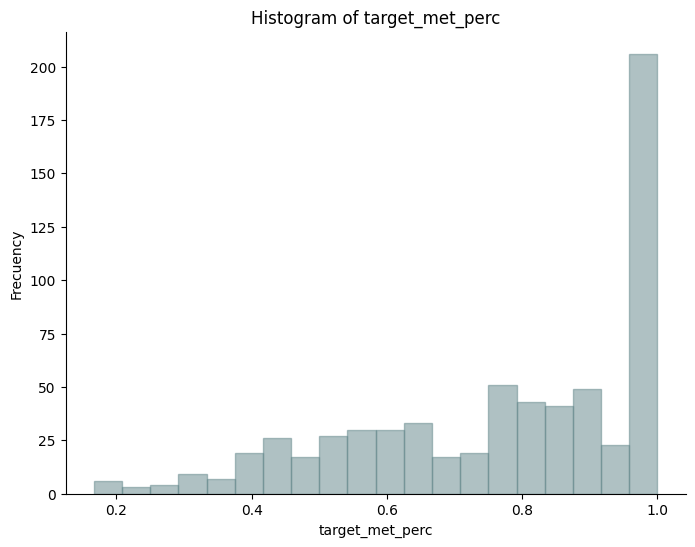

In [24]:
def plot_histogram(data, column_name):
    plt.figure(figsize=(8, 6))
    plt.hist(data[column_name], bins=20, edgecolor='#608589', color='#608589', alpha=0.5)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frecuency')
    plt.grid(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

plot_histogram(iged_df_ml, 'target_met_perc')

#### Correlation for every variable of inetrest

<Axes: >

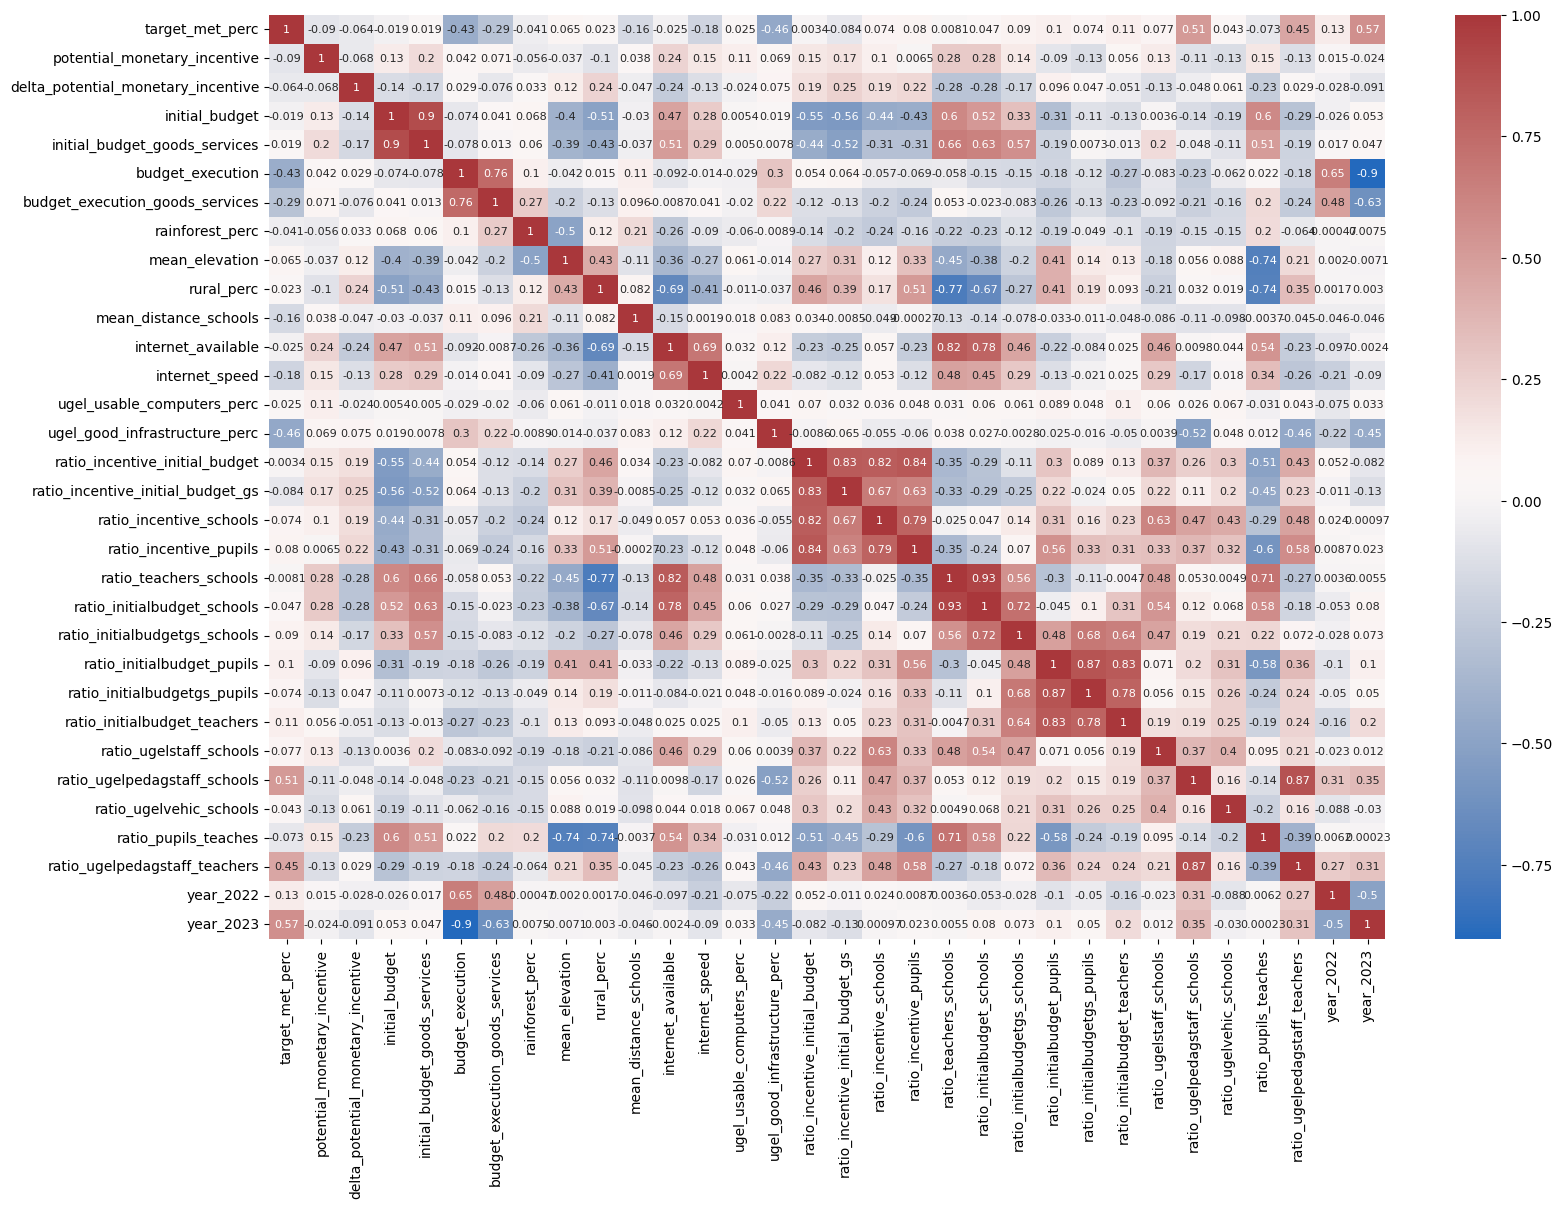

In [25]:
plt.figure(figsize=(18,12))
sns.heatmap(pd.concat([y2,X], axis=1).corr(), annot = True, cmap = 'vlag', annot_kws={'size':8})

#### Deep dive into the higest correlated variables

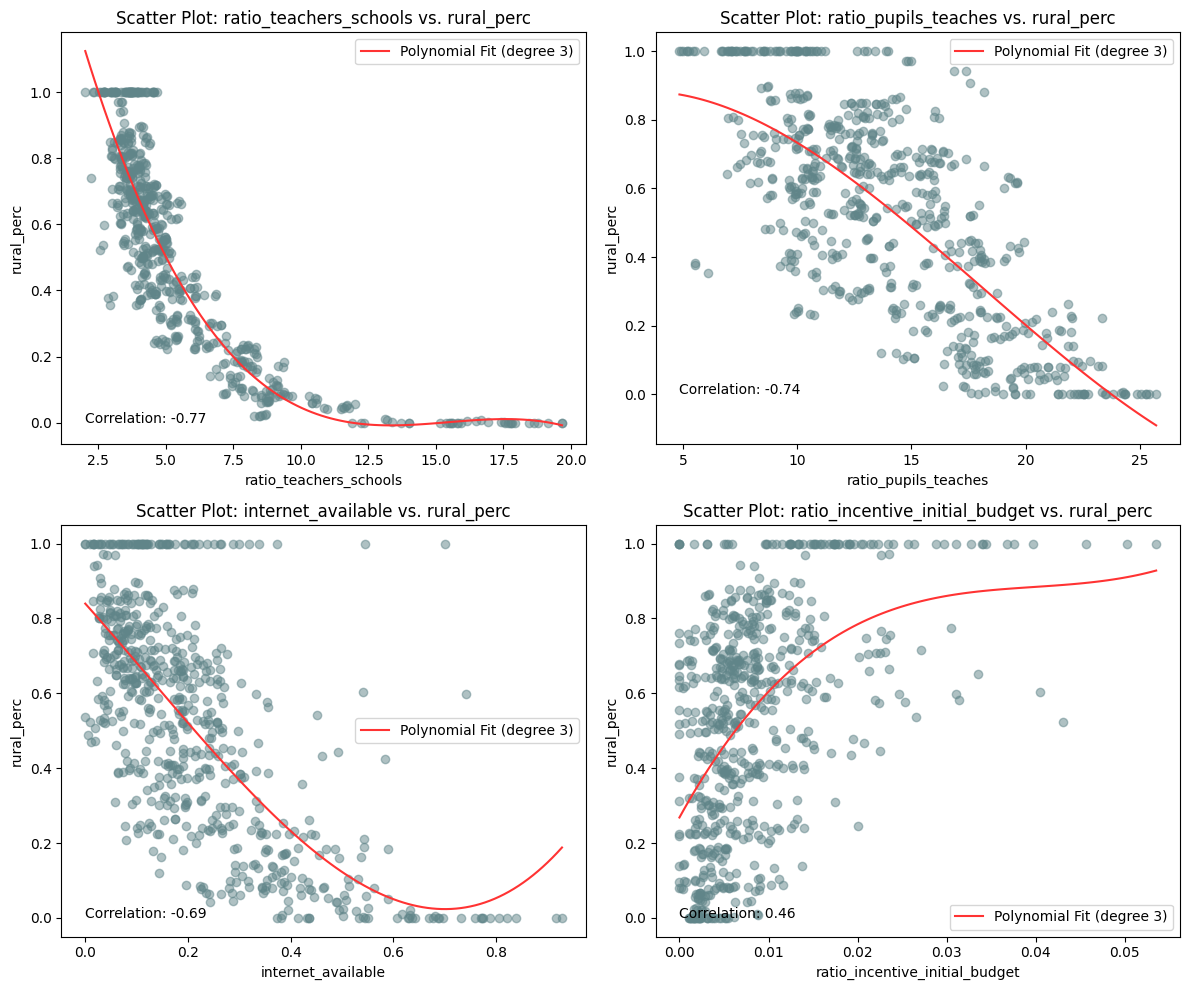

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

def scatter_plot(df, x_col, y_col, degree=1, ax=None):
    x = df[x_col]
    y = df[y_col]
    corr_coefficient, _ = pearsonr(x, y)

    poly_coefficients = np.polyfit(x, y, degree)
    poly = np.poly1d(poly_coefficients)
    x_range = np.linspace(min(x), max(x), 100)
    y_trendline = poly(x_range)

    if ax is None:
        plt.figure(figsize=(8, 6))
    else:
        plt.sca(ax)

    plt.scatter(x, y, color='#608589', alpha=0.5)
    plt.plot(x_range, y_trendline, color='#FF3333', label=f'Polynomial Fit (degree {degree})')

    plt.title(f'Scatter Plot: {x_col} vs. {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    plt.text(min(x), min(y), f'Correlation: {corr_coefficient:.2f}', fontsize=10)
    plt.grid(False)

    plt.legend()

# 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

scatter_plot(iged_df_ml, 'ratio_teachers_schools', 'rural_perc', degree=3, ax=axs[0, 0])
scatter_plot(iged_df_ml, 'ratio_pupils_teaches', 'rural_perc', degree=3, ax=axs[0, 1])
scatter_plot(iged_df_ml, 'internet_available', 'rural_perc', degree=3, ax=axs[1, 0])
scatter_plot(iged_df_ml, 'ratio_incentive_initial_budget', 'rural_perc', degree=3, ax=axs[1, 1])


plt.tight_layout()
plt.show()

#### Training a model to explain and predict target_met_perc

In [27]:
print("Number of features: ",len(list(X.columns)))
print("number of observations in the train set: ",len(X))

Number of features:  31
number of observations in the train set:  660


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=113)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = [
    LinearRegression(),
    Ridge(alpha=1),
    Lasso(alpha=1, max_iter=10000),
    SVR(kernel="linear"),
    SVR(kernel="rbf"),
    RandomForestRegressor(random_state=113),
    GradientBoostingRegressor(random_state=113)
]

# Metrics
model_names = []
train_rmse_scores = []
test_rmse_scores = []
train_mape_scores = []
test_mape_scores = []
train_r_squared_scores = []
test_r_squared_scores = []

for model in models:
    model_name = model.__class__.__name__
    model_names.append(model_name)

    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # RMSE for train and test sets
    from sklearn.metrics import mean_squared_error
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # MAPE for train and test sets
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    # R-squared for train and test sets
    train_r_squared = r2_score(y_train, y_train_pred)
    test_r_squared = r2_score(y_test, y_test_pred)

    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)
    train_r_squared_scores.append(train_r_squared)
    test_r_squared_scores.append(test_r_squared)

    print(f"Model: {model_name}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Train MAPE: {train_mape:.4f}%")
    print(f"Test MAPE: {test_mape:.4f}%")
    print(f"Train Adjusted R-squared: {train_r_squared:.4f}")
    print(f"Test Adjusted R-squared: {test_r_squared:.4f}")
    print("=" * 30, "\n")


Model: LinearRegression
Train RMSE: 0.1342
Test RMSE: 0.2306
Train MAPE: 16.8881%
Test MAPE: 24.4254%
Train Adjusted R-squared: 0.6058
Test Adjusted R-squared: -0.0255

Model: Ridge
Train RMSE: 0.1343
Test RMSE: 0.2295
Train MAPE: 16.9231%
Test MAPE: 24.4307%
Train Adjusted R-squared: 0.6056
Test Adjusted R-squared: -0.0157

Model: Lasso
Train RMSE: 0.2138
Test RMSE: 0.2278
Train MAPE: 30.4538%
Test MAPE: 36.0747%
Train Adjusted R-squared: 0.0000
Test Adjusted R-squared: -0.0003

Model: SVR
Train RMSE: 0.1359
Test RMSE: 0.2216
Train MAPE: 17.3520%
Test MAPE: 24.9528%
Train Adjusted R-squared: 0.5959
Test Adjusted R-squared: 0.0531

Model: SVR
Train RMSE: 0.1010
Test RMSE: 0.1581
Train MAPE: 13.1261%
Test MAPE: 23.5092%
Train Adjusted R-squared: 0.7768
Test Adjusted R-squared: 0.5181

Model: RandomForestRegressor
Train RMSE: 0.0532
Test RMSE: 0.1594
Train MAPE: 6.5095%
Test MAPE: 23.3031%
Train Adjusted R-squared: 0.9380
Test Adjusted R-squared: 0.5101

Model: GradientBoostingRegressor


#### Fature importances for the Random Forest Model

In [31]:
gb_model = GradientBoostingRegressor(random_state=113)
gb_model.fit(X_train_scaled, y_train)

feature_importances = gb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df

feature_importance_dict = dict(zip())

for index, row in top_10_features.iterrows():
    feature_name = row['Feature']
    importance_score = row['Importance']
    feature_importance_dict[feature_name] = importance_score

print("{")
for key, value in feature_importance_dict.items():
    print(f"'{key}': {value},")
print("}")

{
'ratio_ugelpedagstaff_schools': 0.45068174956476864,
'year_2023': 0.09592320057131042,
'year_2022': 0.041274139750491434,
'mean_distance_schools': 0.0355543745285278,
'budget_execution': 0.03491264023036446,
'internet_speed': 0.027694135626650847,
'mean_elevation': 0.026450871461890256,
'initial_budget': 0.02534986871412767,
'budget_execution_goods_services': 0.02190598566005459,
'internet_available': 0.021463300623023967,
'ratio_ugelpedagstaff_teachers': 0.01867119089107902,
'ratio_ugelvehic_schools': 0.017093814431225433,
'ratio_initialbudgetgs_schools': 0.016778949777070257,
'ratio_teachers_schools': 0.01641491447141451,
'ratio_initialbudget_pupils': 0.014386152156489895,
'ratio_initialbudget_teachers': 0.013550769432676168,
'ugel_usable_computers_perc': 0.01323105277621666,
'ratio_incentive_initial_budget_gs': 0.012572910925516432,
'ratio_initialbudgetgs_pupils': 0.011562239635316246,
'initial_budget_goods_services': 0.01146414792776568,
'potential_monetary_incentive': 0.01092711

#### Maximizing the performance of the Models
We are planning to conduct a comprehensive Grid Search, exploring various models and parameters. The goal is to identify the optimal model that will guide our future efforts.

##### Random Forest Model
Not much improvement was found.

In [37]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {
    'n_estimators': [225, 250, 275],
    'max_depth': [4, 8, 12],
    'max_features': ['sqrt','log2'],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3, 4],
    'random_state' : [113]
}

rf_model = RandomForestRegressor()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_test_pred = best_estimator.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r_squared = r2_score(y_test, y_test_pred)

print(f"Test RMSE with Best Model: {test_rmse:.4f}")
print(f"Test MAPE with Best Model: {test_mape:.4f}%")
print(f"Test Adjusted R-squared with Best Model: {test_r_squared:.4f}")

Best Parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 225, 'random_state': 113}
Test RMSE with Best Model: 0.1591
Test MAPE with Best Model: 23.7871%
Test Adjusted R-squared with Best Model: 0.5119


##### Gradient Boost Model
No significant improvement found

In [39]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {
    'learning_rate': [0.001, 0.005, 0.01],
    'n_estimators': [300, 325, 350],
    'max_depth': [3, 4, 5],
    'max_features': ['sqrt','log2'],
    'min_samples_split': [2],
    'min_samples_leaf': [4, 5],
    'random_state' : [113]
}

gb_model = GradientBoostingRegressor()

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_test_pred = best_estimator.predict(X_test_scaled)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r_squared = r2_score(y_test, y_test_pred)

print(f"Test RMSE with Best Model: {test_rmse:.4f}")
print(f"Test MAPE with Best Model: {test_mape:.4f}%")
print(f"Test Adjusted R-squared with Best Model: {test_r_squared:.4f}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 350, 'random_state': 113}
Test RMSE with Best Model: 0.1620
Test MAPE with Best Model: 24.3784%
Test Adjusted R-squared with Best Model: 0.4940


##### Ridge Model

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
}

ridge_model = Ridge()


grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_test_pred = best_estimator.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r_squared = r2_score(y_test, y_test_pred)

print(f"Test RMSE with Best Model: {test_rmse:.4f}")
print(f"Test MAPE with Best Model: {test_mape:.4f}%")
print(f"Test Adjusted R-squared with Best Model: {test_r_squared:.4f}")

Best Parameters: {'alpha': 10}
Test RMSE with Best Model: 0.2135
Test MAPE with Best Model: 24.5475%
Test Adjusted R-squared with Best Model: 0.1207


##### Lasso Model

In [41]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]  # Adjust the range of alpha values as needed
}

lasso_model = Lasso()

grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_test_pred = best_estimator.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r_squared = r2_score(y_test, y_test_pred)

print(f"Test RMSE with Best Model: {test_rmse:.4f}")
print(f"Test MAPE with Best Model: {test_mape:.4f}%")
print(f"Test Adjusted R-squared with Best Model: {test_r_squared:.4f}")

Best Parameters: {'alpha': 0.01}
Test RMSE with Best Model: 0.1619
Test MAPE with Best Model: 24.4569%
Test Adjusted R-squared with Best Model: 0.4943


#### Exploring the best models
Final test of the models to explain and predict target met percentage variable.

In [44]:
# Models
models = [
    LinearRegression(),
    Ridge(alpha=10.0),
    Lasso(alpha=0.01, max_iter=10000),
    SVR(kernel="linear"),
    SVR(kernel="rbf"),
    RandomForestRegressor(max_depth= 8, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 2, n_estimators= 225, random_state=113),
    GradientBoostingRegressor(random_state=113)
]

r_squared_matrix = np.zeros((len(models), 5))

targets = [y1, y2, y3, y4, y5]

for i, model in enumerate(models):
    for j, target in enumerate(targets):
        X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=113)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)
        y_test_pred = model.predict(X_test_scaled)

        r_squared = r2_score(y_test, y_test_pred)
        r_squared_matrix[i, j] = r_squared

columns = ['y1', 'y2', 'y3', 'y4', 'y5']
r_squared_df = pd.DataFrame(r_squared_matrix, columns=columns, index=[model.__class__.__name__ for model in models])
r_squared_df

,y1,y2,y3,y4,y5
LinearRegression,-1.544286,-0.025540,-0.236309,0.099282,-1.121600
Ridge,-0.602096,0.120732,-0.031275,0.211587,-0.556295
Lasso,0.002893,0.494344,0.518736,0.334731,0.029349
SVR,-6.169213,0.053120,-0.372713,0.103600,-0.760858
SVR,-0.013413,0.518135,0.569142,0.294364,0.014734
RandomForestRegressor,0.117306,0.503261,0.572131,0.368984,0.097493
GradientBoostingRegressor,0.025247,0.534407,0.599415,0.292630,0.032630


#### Best Model:
Gradient Boost Regression Model

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=113)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

max_ranfomforest = RandomForestRegressor(max_depth= 4, min_samples_leaf= 5, min_samples_split= 2, n_estimators= 300, random_state=113)
gb_model = GradientBoostingRegressor(random_state=113)
models = [gb_model]

# Metrics
model_names = []
train_rmse_scores = []
test_rmse_scores = []
train_mape_scores = []
test_mape_scores = []
train_r_squared_scores = []
test_r_squared_scores = []

for model in models:
    model_name = model.__class__.__name__
    model_names.append(model_name)

    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # RMSE for train and test sets
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # MAPE for train and test sets
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    # R-squared for train and test sets
    train_r_squared = r2_score(y_train, y_train_pred)
    test_r_squared = r2_score(y_test, y_test_pred)

    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)
    train_r_squared_scores.append(train_r_squared)
    test_r_squared_scores.append(test_r_squared)

    print(f"Model: {model_name}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Train MAPE: {train_mape:.4f}%")
    print(f"Test MAPE: {test_mape:.4f}%")
    print(f"Train Adjusted R-squared: {train_r_squared:.4f}")
    print(f"Test Adjusted R-squared: {test_r_squared:.4f}")
    print("=" * 30, "\n")

feature_importances = models[0].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df

feature_importance_dict = dict(zip())

for index, row in top_10_features.iterrows():
    feature_name = row['Feature']
    importance_score = row['Importance']
    feature_importance_dict[feature_name] = importance_score

print("{")
for key, value in feature_importance_dict.items():
    print(f"'{key}': {value},")
print("}")

Model: GradientBoostingRegressor
Train RMSE: 0.0673
Test RMSE: 0.1554
Train MAPE: 8.1197%
Test MAPE: 22.5742%
Train Adjusted R-squared: 0.9009
Test Adjusted R-squared: 0.5344

{
'ratio_ugelpedagstaff_schools': 0.45068174956476864,
'year_2023': 0.09592320057131042,
'year_2022': 0.041274139750491434,
'mean_distance_schools': 0.0355543745285278,
'budget_execution': 0.03491264023036446,
'internet_speed': 0.027694135626650847,
'mean_elevation': 0.026450871461890256,
'initial_budget': 0.02534986871412767,
'budget_execution_goods_services': 0.02190598566005459,
'internet_available': 0.021463300623023967,
'ratio_ugelpedagstaff_teachers': 0.01867119089107902,
'ratio_ugelvehic_schools': 0.017093814431225433,
'ratio_initialbudgetgs_schools': 0.016778949777070257,
'ratio_teachers_schools': 0.01641491447141451,
'ratio_initialbudget_pupils': 0.014386152156489895,
'ratio_initialbudget_teachers': 0.013550769432676168,
'ugel_usable_computers_perc': 0.01323105277621666,
'ratio_incentive_initial_budget_g

We can clearly see some characteristics of the UGEL and the jurisdiction that affects how well these institutions perform when evaluated in the Compromisos de Desempeño (CdD). Some of the most important features, aside from the years, include:
1. Ratio of the number of pedagogic staff in the UGEL by the number of schools in the jurisdiction (ratio_ugelpedagstaff_schools). This means that the UGEL is better suited for the monitoring tasks in the schools.
2. Geographic and jurisdiction variables, such as how sparse the jurisdiction is (mean_distance_schools), the mean elevation (mean_elevation), and how fast the internet is.
3. How effective the UGEL is to execute the budget they have (budget_execution), as well as the amount of the budget (initial_budget).

<class 'pandas.core.frame.DataFrame'>


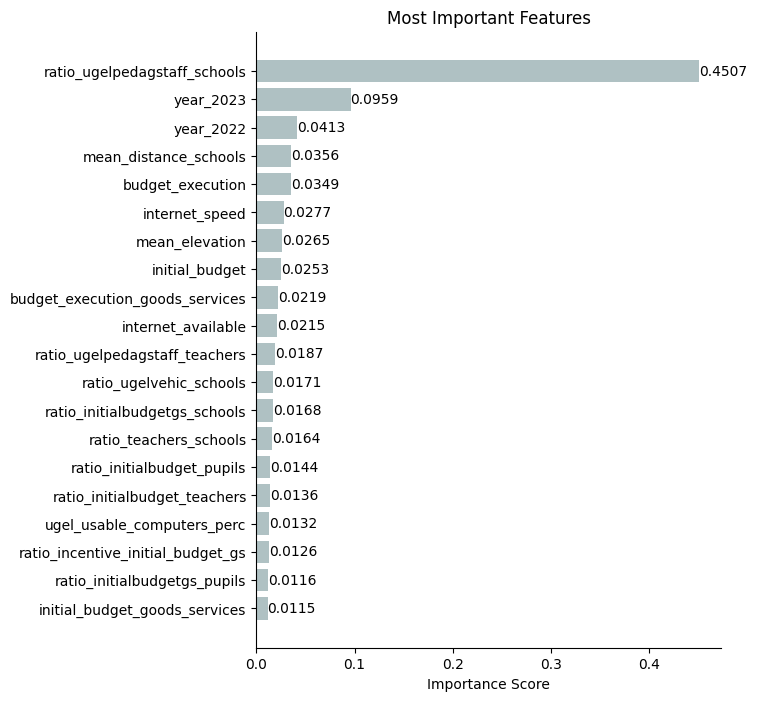

In [50]:
print(type(feature_importance_df))

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_n = 20
plt.figure(figsize=(6, 8))
bars = plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n], color='#608589', alpha=0.5)
plt.xlabel('Importance Score')
plt.title('Most Important Features')
plt.gca().invert_yaxis()
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', va='center')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

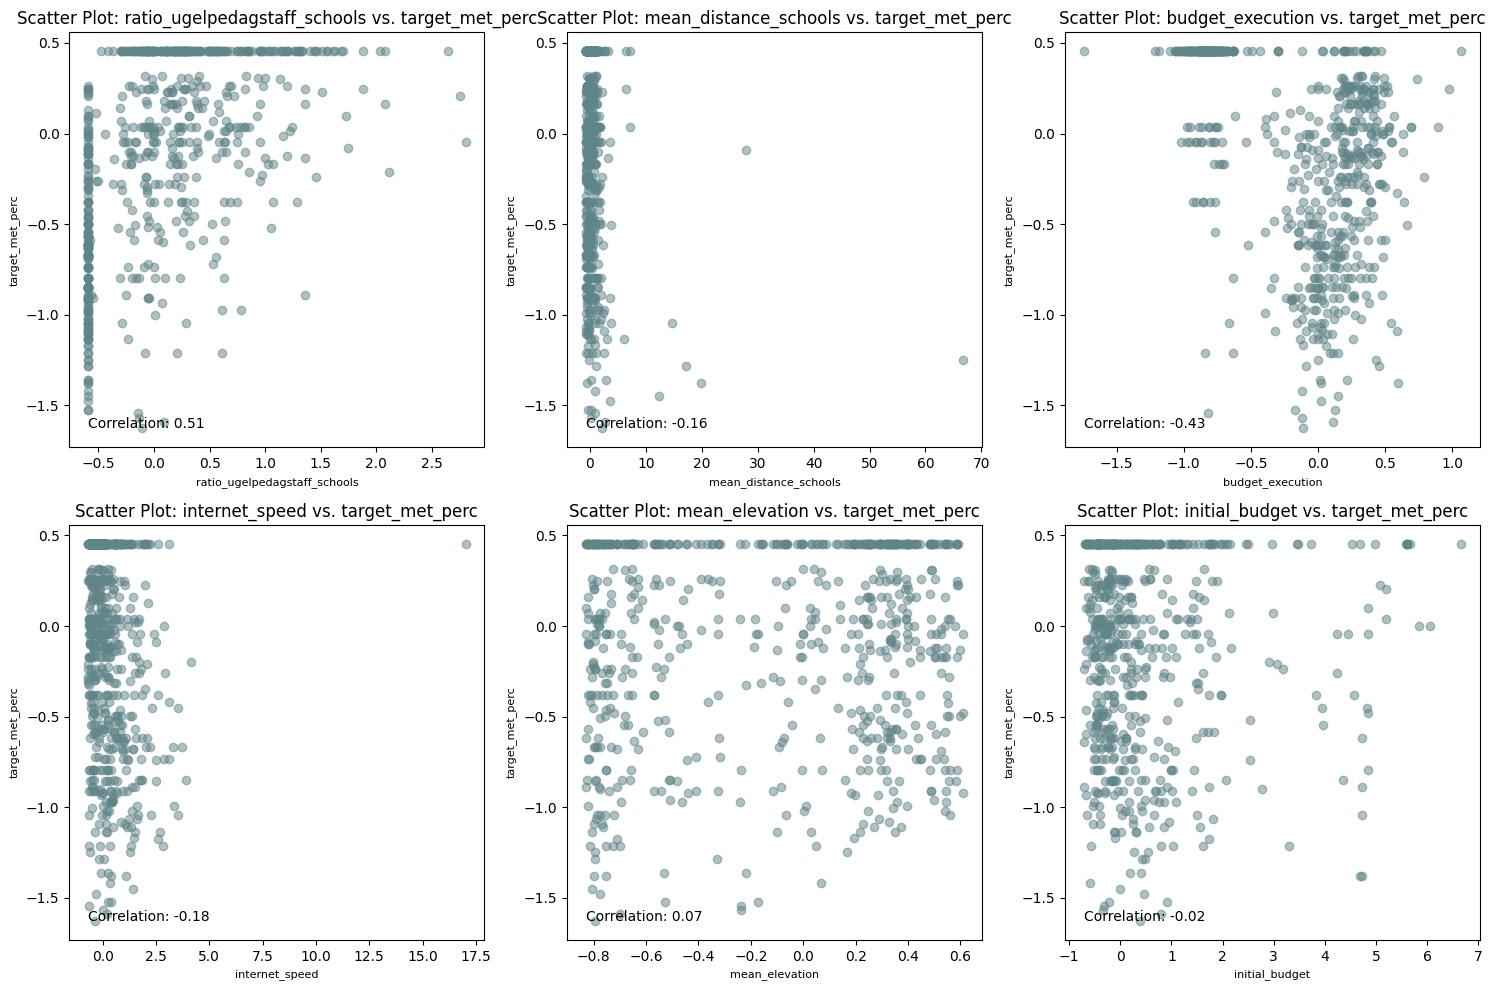

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

def scatter_plot(df, x_col, y_col, degree=1, ax=None):
    x = df[x_col]
    y = df[y_col]
    corr_coefficient, _ = pearsonr(x, y)

    x_range = np.linspace(min(x), max(x), 100)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    else:
        fig = ax.get_figure()

    ax.scatter(x, y, color='#608589', alpha=0.5)

    ax.set_title(f'Scatter Plot: {x_col} vs. {y_col}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

    ax.text(min(x), min(y), f'Correlation: {corr_coefficient:.2f}', fontsize=10)
    ax.grid(False)

    if ax is None:
        plt.show()

columns_to_plot = ['ratio_ugelpedagstaff_schools', 'mean_distance_schools', 'budget_execution', 'internet_speed', 'mean_elevation', 'initial_budget']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

scaler = RobustScaler()
chart_X = pd.DataFrame(scaler.fit_transform(pd.concat([y2, X], axis=1)), columns=['target_met_perc'] + X.columns.tolist())

for i, col in enumerate(columns_to_plot):
    scatter_plot(chart_X, col, 'target_met_perc', degree=4, ax=axs[i])
    axs[i].set_xlabel(col, size=8)
    axs[i].set_ylabel('target_met_perc', size=8)

plt.tight_layout()
plt.show()

### Predicting the variation of performance
The variation in the performance achieved, denoted as "delta_achievement", reflects the year-over-year fluctuation in the mean Achieved Score of the UGEL when assessed in the CdD. This implies an apparent enhancement in the UGEL's performance compared to the preceding year. However, it's crucial to acknowledge that each year witnesses the evaluation of different indicators in the CdD, making direct comparisons of the mean Achieved Score between two different years less meaningful.

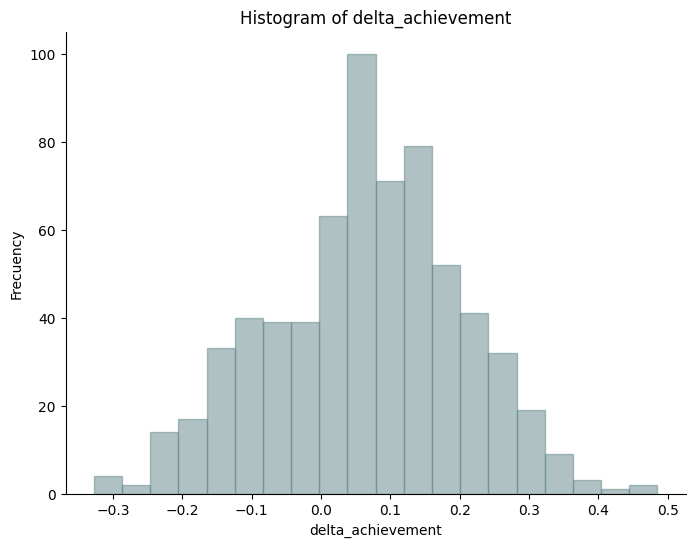

In [60]:
plot_histogram(iged_df_ml, 'delta_achievement')

<Axes: >

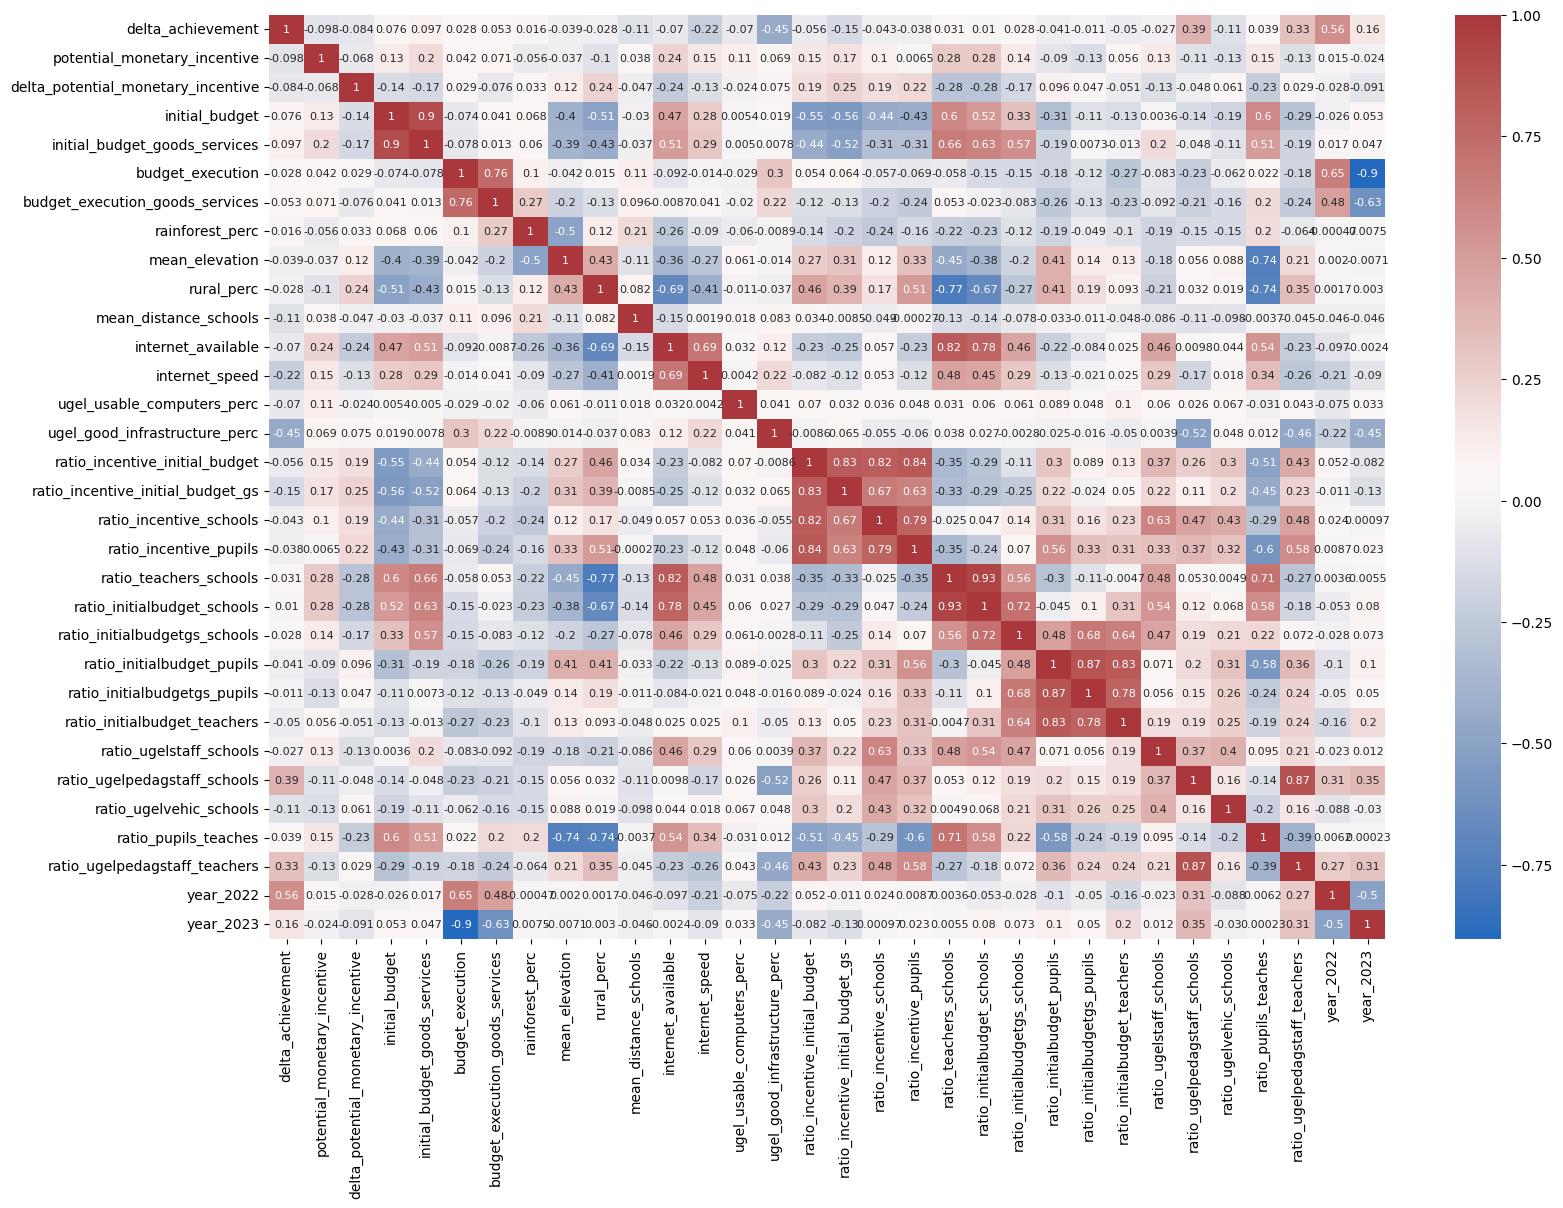

In [61]:
# Correlation
plt.figure(figsize=(18,12))
sns.heatmap(pd.concat([y3,X], axis=1).corr(), annot = True, cmap = 'vlag', annot_kws={'size':8})

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.2, random_state=113)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = [
    RandomForestRegressor(random_state=113),
    GradientBoostingRegressor(random_state=113)
]

# Metrics
model_names = []
train_rmse_scores = []
test_rmse_scores = []
train_mape_scores = []
test_mape_scores = []
train_r_squared_scores = []
test_r_squared_scores = []

for model in models:
    model_name = model.__class__.__name__
    model_names.append(model_name)

    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # RMSE for train and test sets
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # MAPE for train and test sets
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    # R-squared for train and test sets
    train_r_squared = r2_score(y_train, y_train_pred)
    test_r_squared = r2_score(y_test, y_test_pred)

    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)
    train_r_squared_scores.append(train_r_squared)
    test_r_squared_scores.append(test_r_squared)

    print(f"Model: {model_name}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Train MAPE: {train_mape:.4f}%")
    print(f"Test MAPE: {test_mape:.4f}%")
    print(f"Train Adjusted R-squared: {train_r_squared:.4f}")
    print(f"Test Adjusted R-squared: {test_r_squared:.4f}")
    print("=" * 30, "\n")


rf_model = RandomForestRegressor(random_state=113)
rf_model.fit(X_train_scaled, y_train)

feature_importances = models[0].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df

feature_importance_dict = dict(zip())

for index, row in top_10_features.iterrows():
    feature_name = row['Feature']
    importance_score = row['Importance']
    feature_importance_dict[feature_name] = importance_score

print("{")
for key, value in feature_importance_dict.items():
    print(f"'{key}': {value},")
print("}")

Model: RandomForestRegressor
Train RMSE: 0.0308
Test RMSE: 0.0905
Train MAPE: 62.6548%
Test MAPE: inf%
Train Adjusted R-squared: 0.9478
Test Adjusted R-squared: 0.6371

Model: GradientBoostingRegressor
Train RMSE: 0.0444
Test RMSE: 0.0951
Train MAPE: 89.9807%
Test MAPE: inf%
Train Adjusted R-squared: 0.8917
Test Adjusted R-squared: 0.5994

{
'ratio_ugelpedagstaff_schools': 0.3669851664470838,
'ratio_ugelpedagstaff_teachers': 0.10951094851315084,
'year_2022': 0.0694786267104581,
'budget_execution': 0.06821013416957934,
'year_2023': 0.02619748265819548,
'potential_monetary_incentive': 0.025075132227186433,
'budget_execution_goods_services': 0.020588946209139487,
'ratio_ugelvehic_schools': 0.01961801450679429,
'ratio_incentive_initial_budget_gs': 0.019461988966632093,
'mean_distance_schools': 0.018934611146859195,
'mean_elevation': 0.0171178208172295,
'ratio_pupils_teaches': 0.015770726927650004,
'ratio_incentive_schools': 0.015587907307389038,
'ratio_ugelstaff_schools': 0.015473739082596

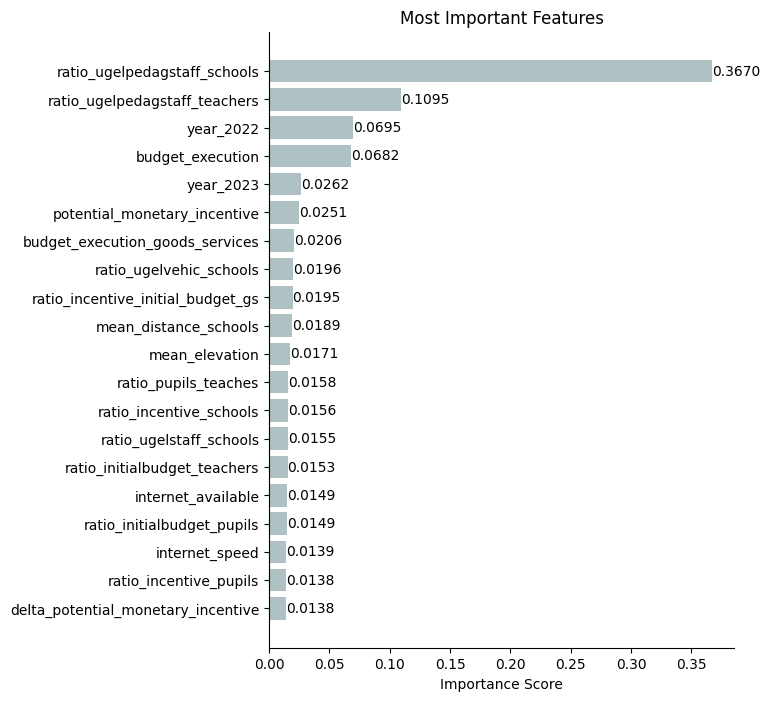

In [68]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_n = 20
plt.figure(figsize=(6, 8))
bars = plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n], color='#608589', alpha=0.5)
plt.xlabel('Importance Score')
plt.title('Most Important Features')
plt.gca().invert_yaxis()
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', va='center')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

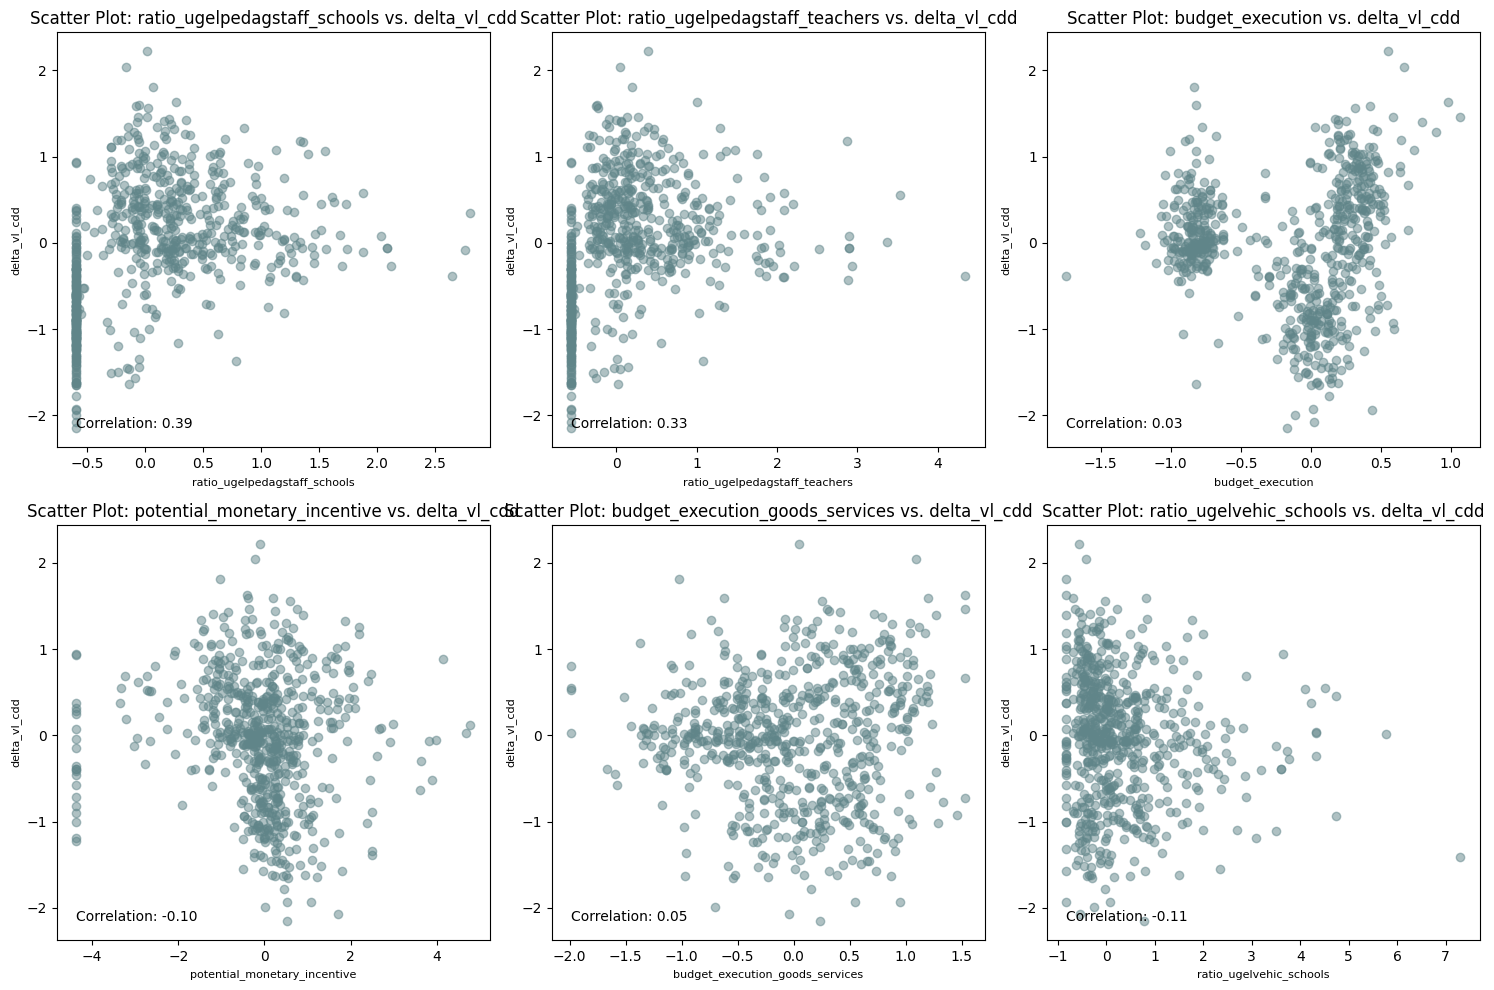

In [70]:
columns_to_plot = ['ratio_ugelpedagstaff_schools', 'ratio_ugelpedagstaff_teachers', 'budget_execution', 'potential_monetary_incentive', 'budget_execution_goods_services', 'ratio_ugelvehic_schools']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

scaler = RobustScaler()
chart_X = pd.DataFrame(scaler.fit_transform(pd.concat([y3, X], axis=1)), columns=['delta_vl_cdd'] + X.columns.tolist())

for i, col in enumerate(columns_to_plot):
    scatter_plot(chart_X, col, 'delta_vl_cdd', degree=4, ax=axs[i])
    axs[i].set_xlabel(col, size=8)
    axs[i].set_ylabel('delta_vl_cdd', size=8)

plt.tight_layout()
plt.show()